# Personal Loan Campaign Case Study

## Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

### Problem Statement

### Context
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

I as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary

- ID: Customer ID
- Age: Customer’s age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (in thousand dollars)
- ZIP Code: Home Address ZIP code.
- Family: the Family size of the customer
- CCAvg: Average spending on credit cards per month (in thousand dollars)
- Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (in thousand dollars)
- Personal_Loan: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
- Securities_Account: Does the customer have securities account with the bank? (0: No, 1: Yes)
- CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
- Online: Do customers use internet banking facilities? (0: No, 1: Yes)
- CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)


In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores


from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)



In [3]:
# loading the dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\Loan_Modelling (1).csv")


<IPython.core.display.Javascript object>

In [4]:
df.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
# viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [6]:
df.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

In [7]:
# copying the data to another variable to avoid any changes to original data
data = df.copy()

<IPython.core.display.Javascript object>

In [8]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no duplicate values in the dataset

In [9]:
# checking for the number of rows and columns of the dataset
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

- The dataset has 5000 rows and 14 columns 
- The column ID is not neccesary and needs to be dropped

In [10]:
# checking for the data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

- The dataset has 13 integers and 1 float data type
- the column Zipcode is an object data type and not an integer data type, needs to be convertered to Object data type
- and no missing value(s)

In [11]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

**I won't need ID for analysis, so let's drop this column.**

In [12]:
data.drop(["ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [14]:
data.shape

(5000, 13)

<IPython.core.display.Javascript object>

In [15]:
# checking for the summary of the data in transpose form
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

**Observations**

- The average age is 45, minimum is 23 and maximum 67
- Negative values in experience column due to input errors, need to be replace  with positive signs
- The average professional experience is 20 and maximum is 43
- The average income is 46, minimum is 8 and maximum is 224
- The average family is 1, same as 1 and maximum is 4
- The average Mortgage is 56, minimum is 0 and maximum 635

In [16]:
# Mapping the values of Education to 1: Undergrad; 2: Graduate 3: Advanced/Professional
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# cross checking for negative values in column experience where experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3], dtype=int64)

<IPython.core.display.Javascript object>

- Negative values are between the range of -1 to -3  and which can be replaced with positive values

In [18]:
# implimenting the correction values for the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

<IPython.core.display.Javascript object>

- All negative values in the column Experience ranging from -1 to -3 have been corrected and replaced with positive values ranging from 1 to 3

In [19]:
# checking for unique values in the zip code column
data["ZIPCode"].unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

<IPython.core.display.Javascript object>

In [20]:
# checking for the sum of unique values in the zip code column
data["ZIPCode"].unique().sum()

43467068

<IPython.core.display.Javascript object>

In [21]:
# checking for the number of unique values in the zip code column
data["ZIPCode"].nunique()

467

<IPython.core.display.Javascript object>

- There are 467  unique set of values in the zip code column

In [22]:
# Converting the zip code from data type int64 to data type str
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)

# Creating column for zip code as object
data["ZIPCode"] = data["ZIPCode"].str[0:2]

# converting the new column zip code data type as category
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


<IPython.core.display.Javascript object>

In [23]:
data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.6,Undergraduate,0,0,1,0,0,0
1,45,19,34,90,3,1.5,Undergraduate,0,0,1,0,0,0
2,39,15,11,94,1,1.0,Undergraduate,0,0,0,0,0,0
3,35,9,100,94,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91,4,1.0,Graduate,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [24]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

<IPython.core.display.Javascript object>

In [1]:
data.head()

NameError: name 'data' is not defined

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

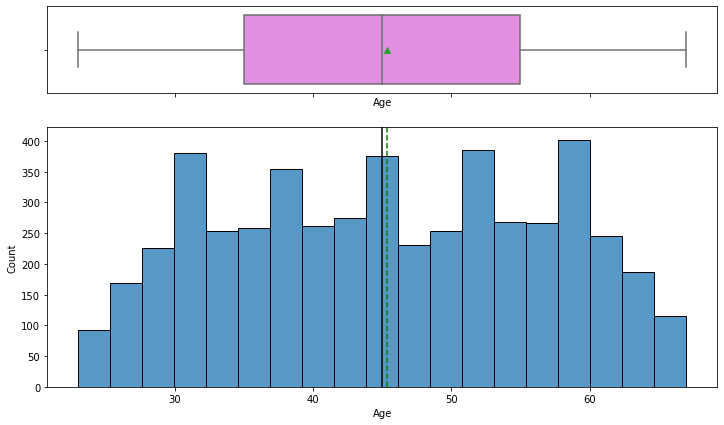

<IPython.core.display.Javascript object>

In [27]:
# plot of column Age on histogram and boxplot
histogram_boxplot(data, "Age")

- Base on the displayed plots, the data of column Age is uniformly distributed
- the average age is around 45
- the minimun age is below 30 and the maximum age is above 60

#### Observations on Experience

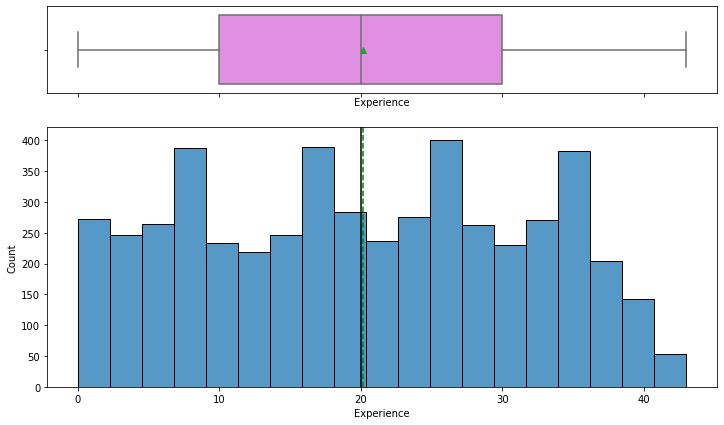

<IPython.core.display.Javascript object>

In [28]:
# plot of column Experience on histogram and boxplot
histogram_boxplot(data, "Experience")

- the data in cloumn Experience is fairly even distributed
- the average professional experience in the column experience is 20
- the highest experience in the column experience is above 40

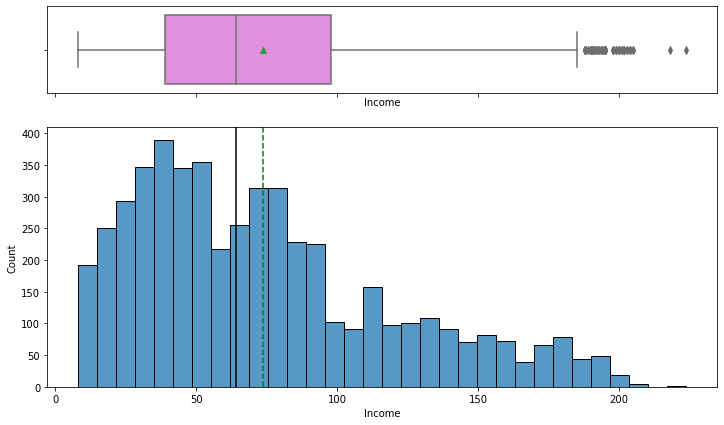

<IPython.core.display.Javascript object>

In [29]:
# plot of column Income on histogram and boxplot
histogram_boxplot(data, "Income")

- the data in the column income is skewed to the right
- the data in the column income has some outliers, meaning a few customers have high income
- from the column income, shows that majority of the customers have income between 0 to 50
- from the data in column income, a few customers have income above 200
- the avaerage income of the customers is between 50 to 100

#### Observations on CCAvg

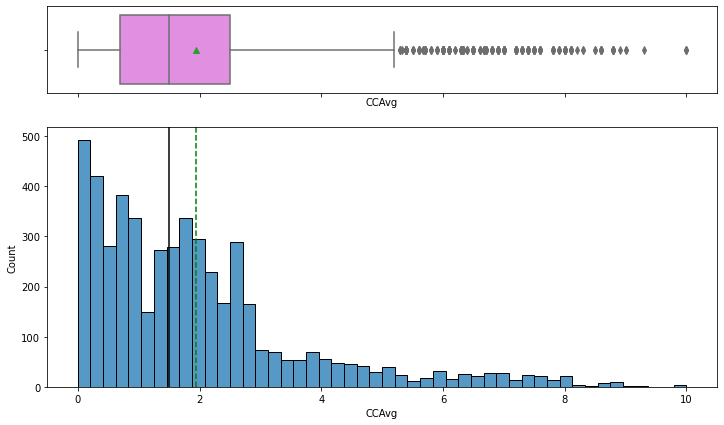

<IPython.core.display.Javascript object>

In [31]:
# plot of column CCAvg on histogram and boxplot
histogram_boxplot(data, "CCAvg")

- from the data in column CCAvg shows that the data is highly skewed to the right
- the data has alot of outliers
- the average spending on credit card per month is less than 2000 dollars
- most of the customers spend between 0 to 2000 dollars per month on credit card
- a few of the customers spend between 8000 to 10,000 dollars month on credit card

#### Observations on Mortgage

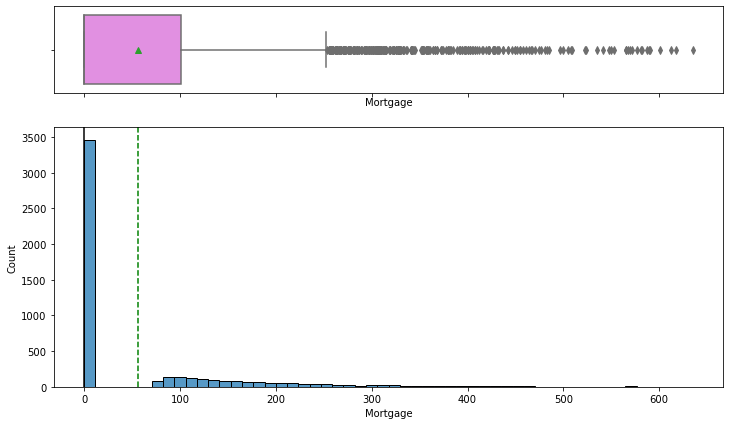

<IPython.core.display.Javascript object>

In [32]:
# plot of column Mortgage on histogram and boxplot
histogram_boxplot(data, "Mortgage")

- From the data in column Mortgage, it is heavily skewed to the right
- quite alot of outliers 
- most of the customers have mortgage less than 100,000 dollars
- very few of the customers have mortgage between 100,000 to 600,000 dollars

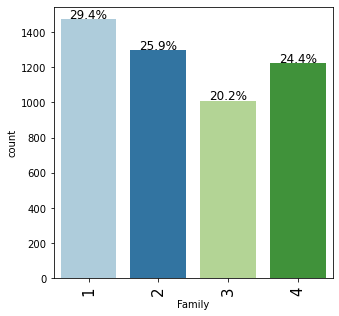

<IPython.core.display.Javascript object>

In [33]:
# plot of column Family on labeled barplot
labeled_barplot(data, "Family", perc=True)

- from the data in column Family, the highest family size is 1 with 29.4%
- family size of 2 and 4 are are the next of almost the same number in percentage 25.9% and 24.4% respectively
- family size of 3 are the least number of family size in terms of percentage 20.2%

#### Observations on Education

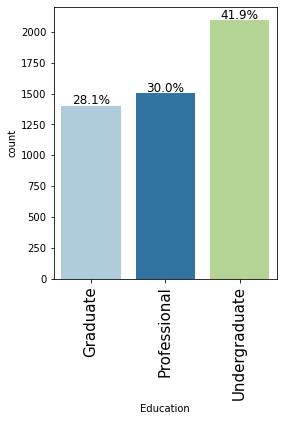

<IPython.core.display.Javascript object>

In [34]:
# plot of column Education on labeled barplot
labeled_barplot(data, "Education", perc=True)

- from the data in the column Education, undergraduate has the highest number in percentage 41.9%
- Next is the professional with 30.0%
- the least is graduate with 28.1%

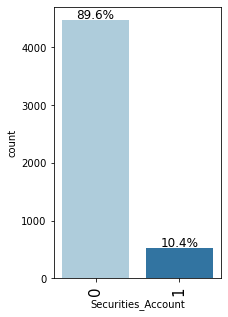

<IPython.core.display.Javascript object>

In [36]:
# plot of column Securities Account on labeled barplot
labeled_barplot(data, "Securities_Account", perc=True)

- from the data above in column Securities_account, majority of the the customers do not have securities account with percentage 89.6%
- only 10.4% of the customers have securities account

#### Observations on CD_Account

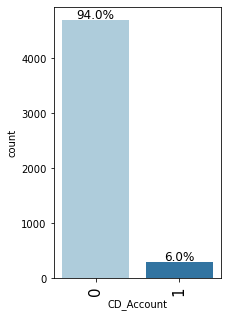

<IPython.core.display.Javascript object>

In [37]:
# plot of column CD Account on labeled barplot
labeled_barplot(data, "CD_Account", perc=True)

- from the data above in the column CD Account, 94.0% of the customers do not have certificate of deposit with bank
- only 6.0% of the customers have certificate of deposit with the bank

#### Observations on Online

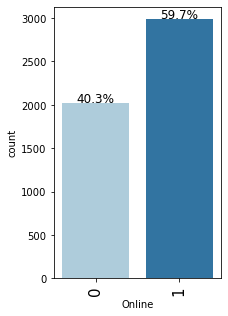

<IPython.core.display.Javascript object>

In [38]:
# plot of column Online on labeled barplot
labeled_barplot(data, "Online", perc=True)

- from the data above in columnn Online, it shows that 59.7% of the customers use internet banking facilities
- 40.3% of the customers do not use internet facilities

#### Observation on CreditCard

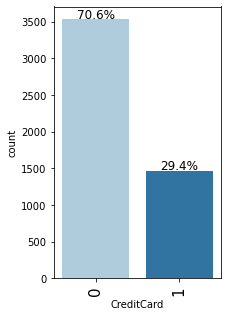

<IPython.core.display.Javascript object>

In [39]:
# plot of column CreditCard on labeled barplot
labeled_barplot(data, "CreditCard", perc=True)

- from the data above in column CreditCard, it shows that 29.4% of the customers use creditcard issued by other banks
- 70.6% of the customers do not use creditcard issued by any other bank.

#### Observation on ZIPCode

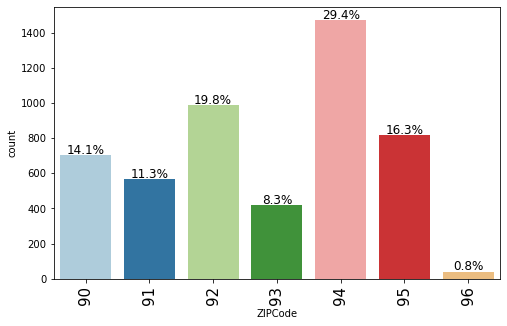

<IPython.core.display.Javascript object>

In [40]:
# plot of column Zipcode on labeled barplot
labeled_barplot(data, "ZIPCode", perc=True)

- from the data above in column Zipcode, 29.4% of the customers live in the same community with zipcode 94 of home address
- next is home address with zipcode 92 of 19.8%
- a few of the customers with zipcode 96 of 0.8% live within this community


### Bivariate Analysis

In [41]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

## Coorelation Matrix Heatmap

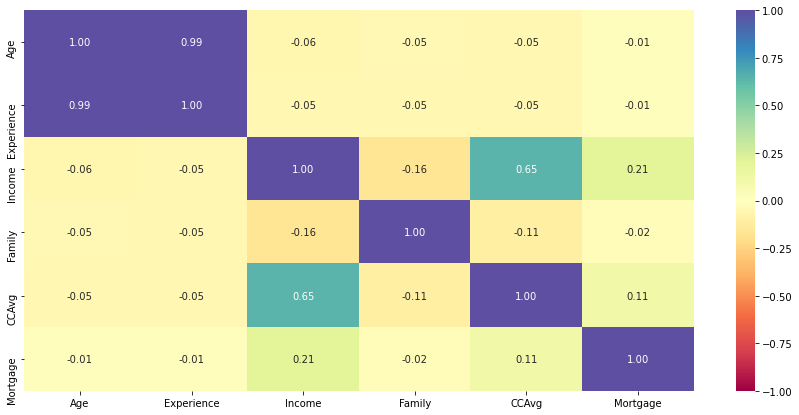

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## This coorelation matrix heatmap has the folowing strong correlations:

- Age and Experience
- Income and CCAvg

## the following columns have weak coorelations:

- Income and Mortgage
- CCAvg and Mortgage

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


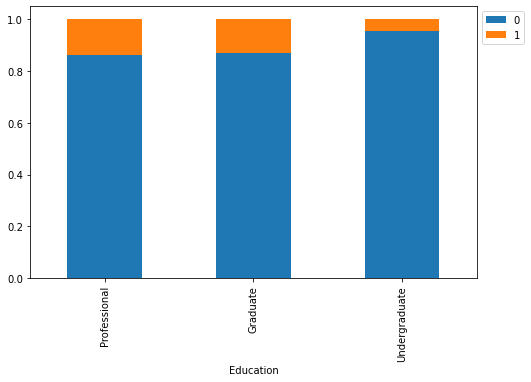

<IPython.core.display.Javascript object>

In [44]:
# checking for customers with education that show interest in loan
stacked_barplot(data, "Education", "Personal_Loan")

- from the data plotted above in column Education show most of the customers with Education do not show interest in purchasing loan.
- out of 5000 customers with Education, only 480 customers show interest in purchasing loan from the bank. most are professionals and are just 205 customers
- the least is the undergraduate 93

## Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


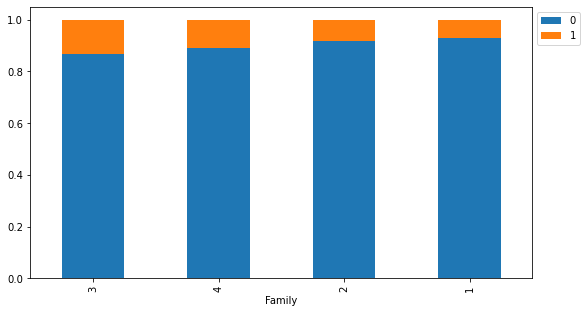

<IPython.core.display.Javascript object>

In [45]:
# checking for customers with Family that show interest in loan
stacked_barplot(data, "Family", "Personal_Loan")

- Family of 4 has the most interest in the loan(134), next is family of 3(133)
- family of 2 has the least interest in the loan(106)

## Personal_Loan vs Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


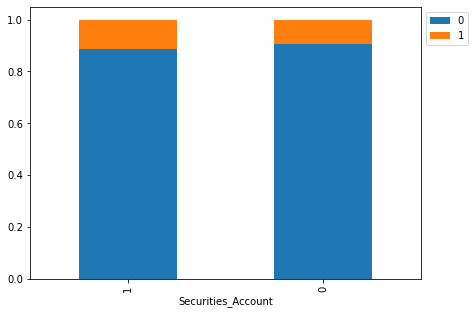

<IPython.core.display.Javascript object>

In [46]:
# checking for customers with Secuirities Account that show interest in loan
stacked_barplot(data, "Securities_Account", "Personal_Loan")

- The customers without securities account that did not show interest in the loan is higher(4058) than the customers with securities account that show interest in the loan(60)

## Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


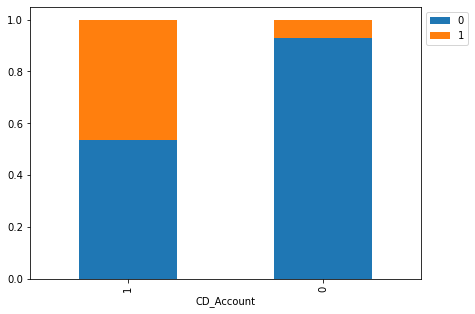

<IPython.core.display.Javascript object>

In [47]:
# checking for customers with CD_Account that show interest in loan
stacked_barplot(data, "CD_Account", "Personal_Loan")

- The number of customers that do not have certificate of deposit with the bank(340) and did not show interest on the loan is very high compare to the number of customers that do not have certificate of deposit and show interest in the loan(340)
- the number of the customers that has certificate of deposit with the bank but did not show interest in the loan(162) are almost of the same number with the number of customers that have certificate of deposit with the bank and show interest in the loan(140)

## Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


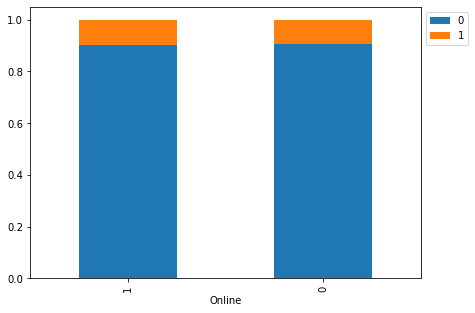

<IPython.core.display.Javascript object>

In [48]:
# checking for customers with Online that show interest in loan
stacked_barplot(data, "Online", "Personal_Loan")

- of all the customers that use the internet banking facilities, 291 are interested on the loan
- of all the customers that do not use the internet banking facilities, 189 are interested on the loan

## Personal_Loan vs CreditCard

- of all the customers that do not use creditcard issued by other banks(3530), 337 show interest in the loan
- 1470 customers that use creditcard issued by other banks, 143 show interest in the loan

## Personal_Loan vs ZIPCode

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40
------------------------------------------------------------------------------------------------------------------------


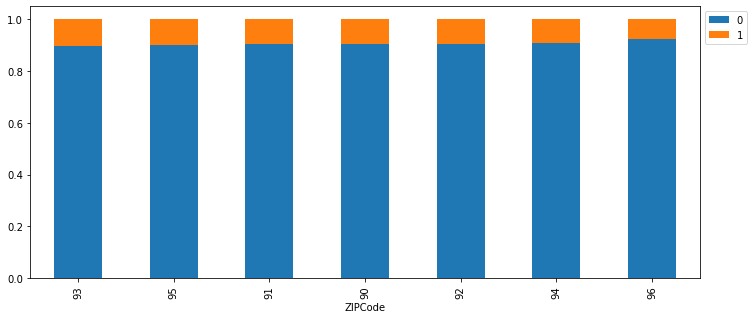

<IPython.core.display.Javascript object>

In [49]:
# checking for customers with ZIPCode that show interest in loan
stacked_barplot(data, "ZIPCode", "Personal_Loan")

## Interest on Personal_loan vs Age

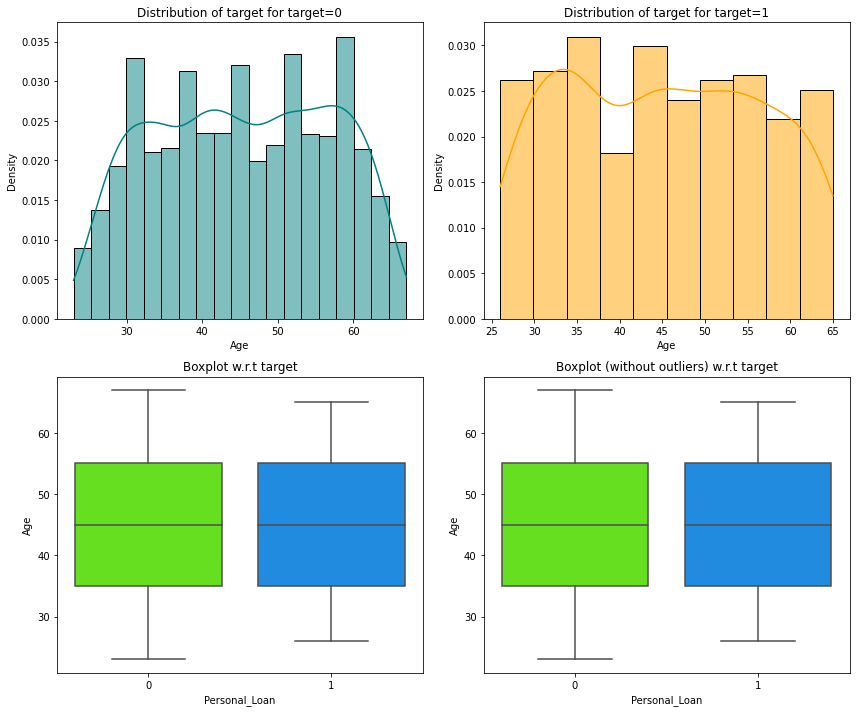

<IPython.core.display.Javascript object>

In [50]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

- the average age is between 40 - 50 that show interest on the loan

## Interest on Personal_loan vs Experience

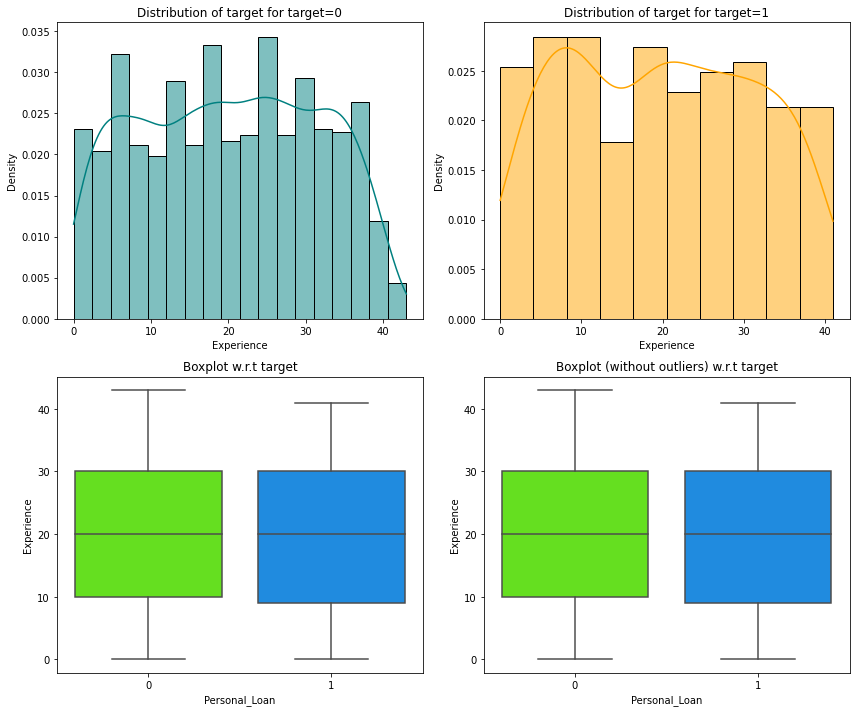

<IPython.core.display.Javascript object>

In [51]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

- Age and Experience seem to have similiar distribution of data but is 20 on the Average.

## Interest on Personal_loan vs Income

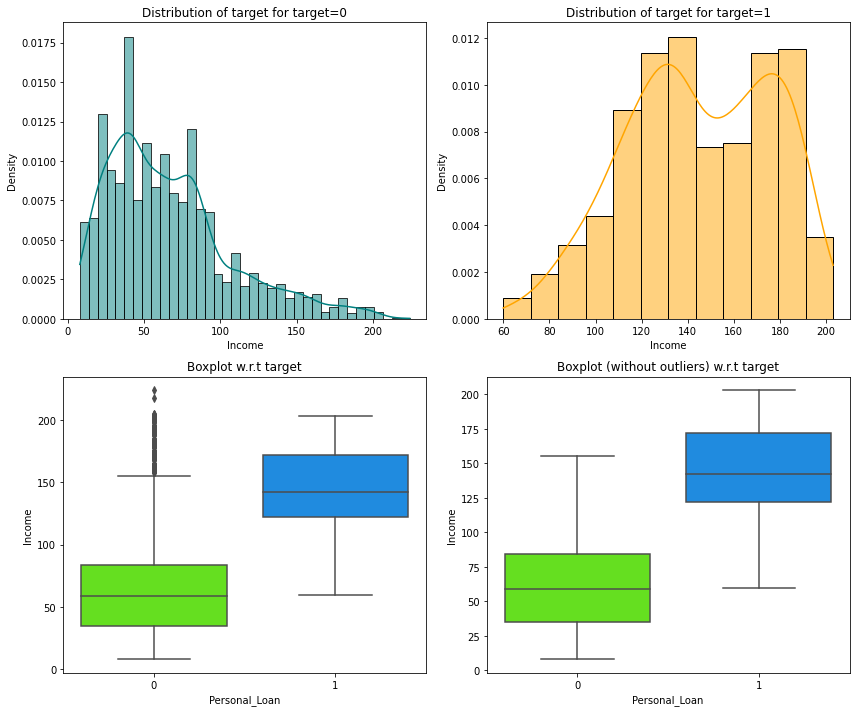

<IPython.core.display.Javascript object>

In [52]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

- target = 0 on Income has right skewed data with some outliers
- target = 1 on Income has slightly left skewed data with no outliers

## Interest on Personal_loan vs CCAvg

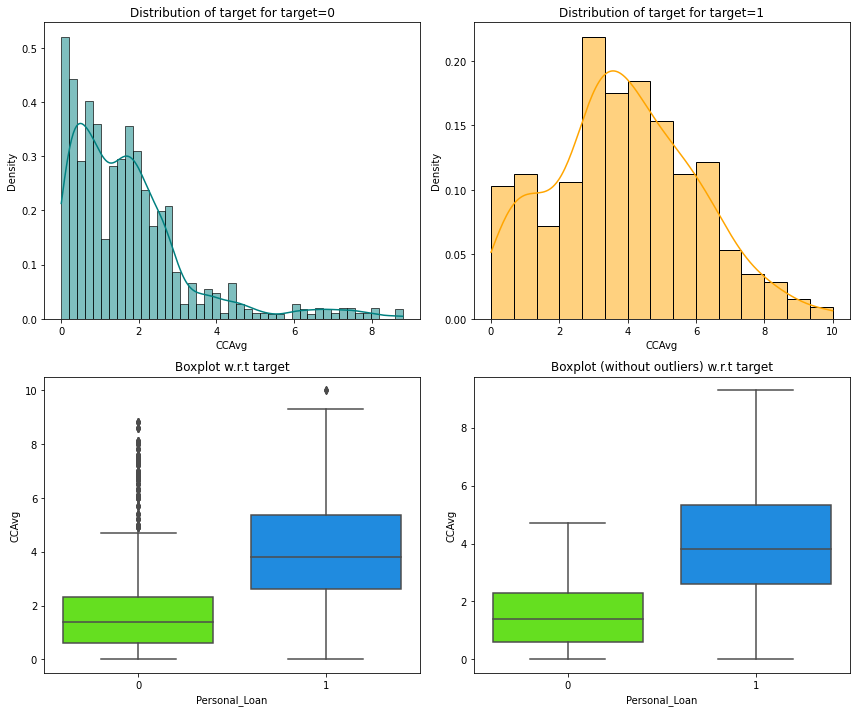

<IPython.core.display.Javascript object>

In [53]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

- Distribution Target = 0 wrt CCAvg is skewed to the right with outliers on the Personal Loan
- The distribution target = 1 wrt CCAvg is slightly skewed to the right with no outliers on the Personal Loan

### Outlier Detection

In [55]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()


<IPython.core.display.Javascript object>

In [56]:
Q1 = data.quantile(0.25)  # Calculate the first quartile (Q1)
print(f"Q1 (25th percentile): {Q1}")

Q3 = data.quantile(0.75)  # Calculate the first quartile (Q3)
print(f"Q1 (25th percentile): {Q1}")

IQR = Q3 - Q1  # calculating the interquantile range
print("the IQR is:", IQR)

Q1 (25th percentile): Age           35.0
Experience    10.0
Income        39.0
Family         1.0
CCAvg          0.7
Mortgage       0.0
Name: 0.25, dtype: float64
Q1 (25th percentile): Age           35.0
Experience    10.0
Income        39.0
Family         1.0
CCAvg          0.7
Mortgage       0.0
Name: 0.25, dtype: float64
the IQR is: Age            20.0
Experience     20.0
Income         59.0
Family          2.0
CCAvg           1.8
Mortgage      101.0
dtype: float64


<IPython.core.display.Javascript object>

In [57]:
lower = Q1 - 1.5 * IQR
print(lower)

Age             5.0
Experience    -20.0
Income        -49.5
Family         -2.0
CCAvg          -2.0
Mortgage     -151.5
dtype: float64


<IPython.core.display.Javascript object>

In [58]:
upper = Q1 + 1.5 * IQR
print(upper)

Age            65.0
Experience     40.0
Income        127.5
Family          4.0
CCAvg           3.4
Mortgage      151.5
dtype: float64


<IPython.core.display.Javascript object>

In [59]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age            0.72
Experience     1.08
Income        15.42
Family         0.00
CCAvg         14.42
Mortgage      15.52
dtype: float64

<IPython.core.display.Javascript object>

In [89]:
X.head()

,Age,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,49,91,4,1.6,Undergraduate,0,1,0,0,0
1,45,34,90,3,1.5,Undergraduate,0,1,0,0,0
2,39,11,94,1,1.0,Undergraduate,0,0,0,0,0
3,35,100,94,1,2.7,Graduate,0,0,0,0,0
4,35,45,91,4,1.0,Graduate,0,0,0,0,1


<IPython.core.display.Javascript object>

## Data Preprocessing

### Seperating/splitting of the data into train, test and validation

In [87]:
# Splitting of the independent and dependent variable
X = data.drop(["Personal_Loan", "Experience"], axis=1)
y = data["Personal_Loan"]

<IPython.core.display.Javascript object>

In [90]:
# encoding the categorical variables
X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)
X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_Professional,Education_Undergraduate
0,25,49,4,1.6,0,1,0,0,0,1,0,0,0,0,0,0,1
1,45,34,3,1.5,0,1,0,0,0,0,0,0,0,0,0,0,1
2,39,11,1,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,35,100,1,2.7,0,0,0,0,0,0,0,0,1,0,0,0,0
4,35,45,4,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

**Creating training and test sets.**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [92]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [93]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

## Model Building

In [94]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [95]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Build Decision Tree Model

In [96]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

### Checking model performance on training set

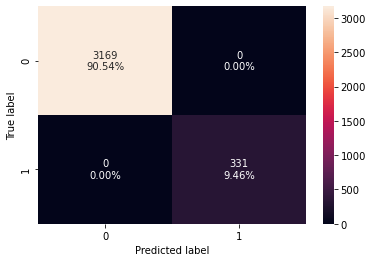

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_sklearn(
    model, X_train, y_train
)  # creating the confusion matrix for the recall

In [98]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

* Model is giving good and generalized results on training and test set.

#### Visualizing the Decision Tree

In [99]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


<IPython.core.display.Javascript object>

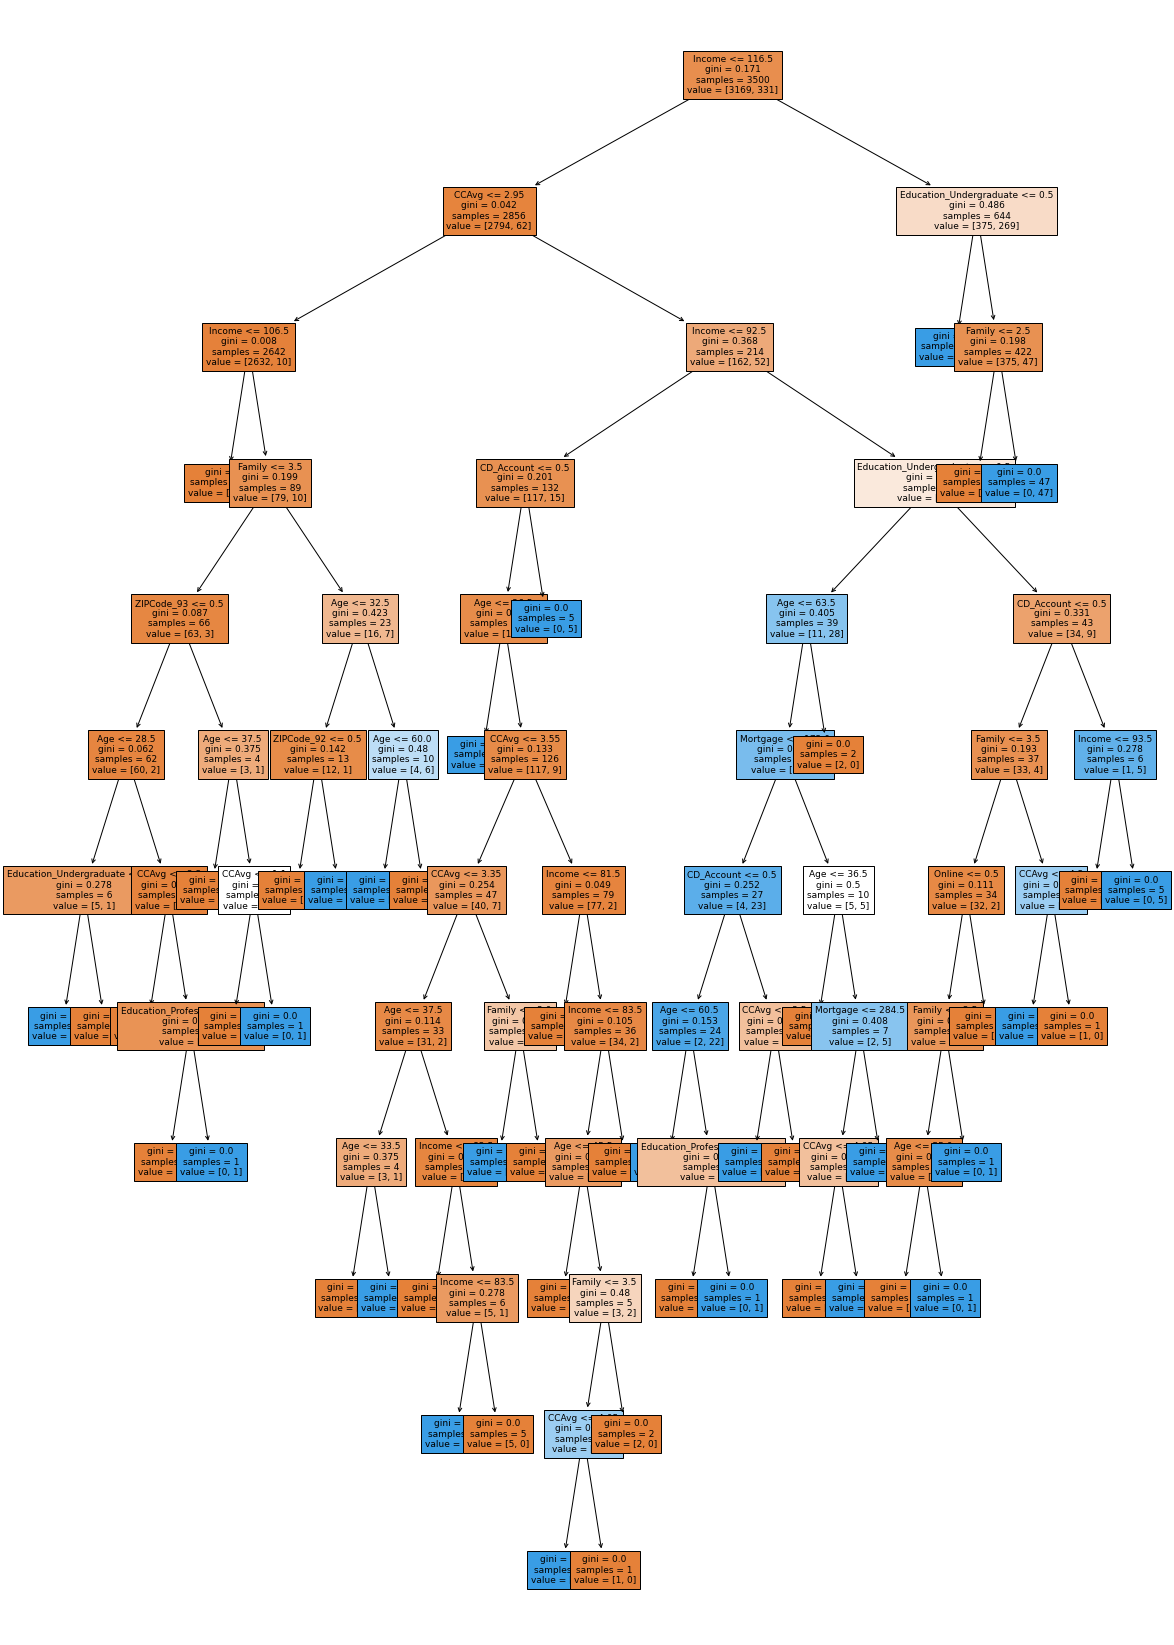

<IPython.core.display.Javascript object>

In [100]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Alot of leaves, nodes and branches. 
- Alot of overlapping of node leaves
- Very huge tree and difficult to interpret

In [101]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

<IPython.core.display.Javascript object>

In [102]:
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


<IPython.core.display.Javascript object>

- From the features importance,  Education has the priority, next is income and the  leasts are Securities_Account and Online

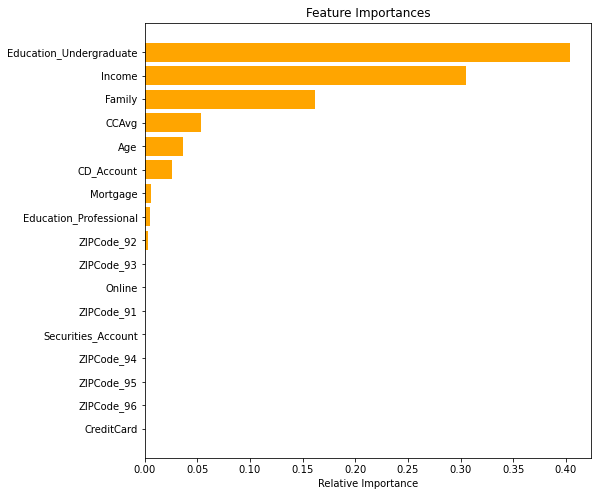

<IPython.core.display.Javascript object>

In [103]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Orange", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- this still shows that the Education(0.4) has the lead in feature importance, then next is income(0.3), then income (0.15).
- the leasts are Online and Securities_Account both are (0.00) 

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [104]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

#### Checking model performance on test data

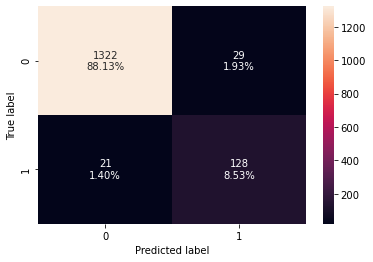

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model performance has improved and the model has become simpler.

In [107]:
# model performance on test data
decision_tree_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.966667,0.85906,0.815287,0.836601


<IPython.core.display.Javascript object>

- Accuracy 98%
- Recall 87%
- Precision 92%
- F1 90%

### Model Performance Improvement

#### Pre-Pruning

In [108]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}


# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

<IPython.core.display.Javascript object>

### Checking performance on training set

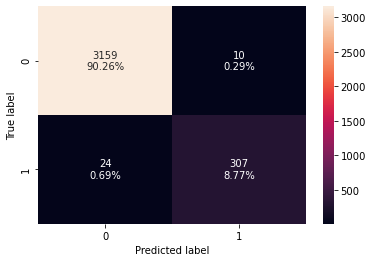

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [110]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.990286,0.927492,0.968454,0.947531


<IPython.core.display.Javascript object>

* The Recall has improved on the training set as compared to the initial model.

**Visualizing the Decision Tree**

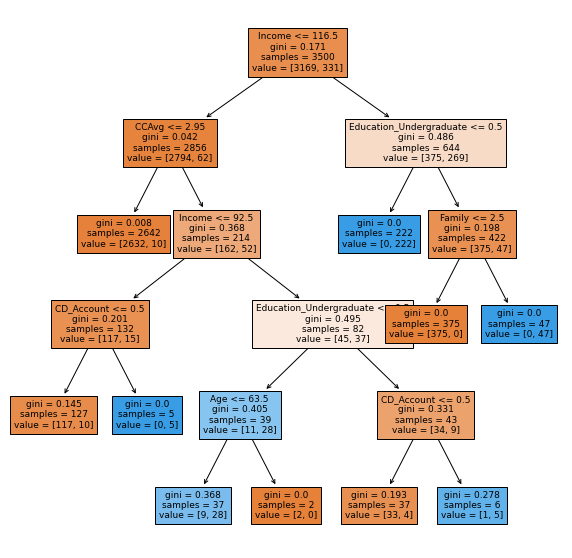

<IPython.core.display.Javascript object>

In [111]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- the decision has been pronned of alot of nodes and leaves
- the decision Tree is now easy to interpret and read
- is not as complex as the previous

In [112]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.

<IPython.core.display.Javascript object>

In [113]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.446191
Income                   0.327387
Family                   0.155083
CCAvg                    0.042061
CD_Account               0.025243
Age                      0.004035
Securities_Account       0.000000
Online                   0.000000
Mortgage                 0.000000
ZIPCode_91               0.000000
ZIPCode_92               0.000000
ZIPCode_93               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
Education_Professional   0.000000
CreditCard               0.000000


<IPython.core.display.Javascript object>

_ base on the feature importance, Education still remains the lead (0.445), next is income(0.3), then family(0.15)
- Age, ZIPCode, Mortage, Securities_Account, Online and creditcard are rated (0.000)

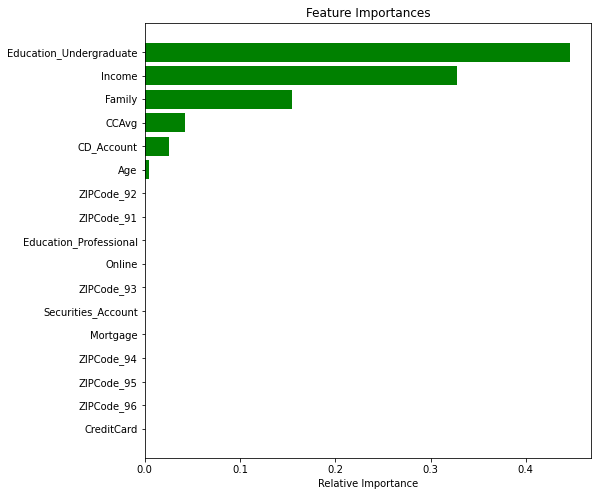

<IPython.core.display.Javascript object>

In [114]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="Green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- the feature imporance have greatly improved unlike the previous
- Education(0.445), income(0.327), family(0.154)

**Checking performance on test data**

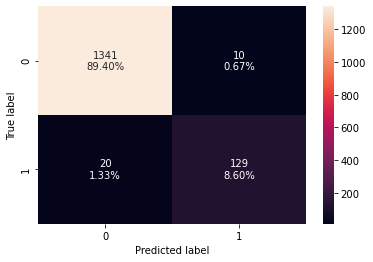

<IPython.core.display.Javascript object>

In [115]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [116]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.865772,0.928058,0.895833


<IPython.core.display.Javascript object>

- the value for recall has reduced

In [118]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

#### Cost-Complexity Pruning

In [119]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


<IPython.core.display.Javascript object>

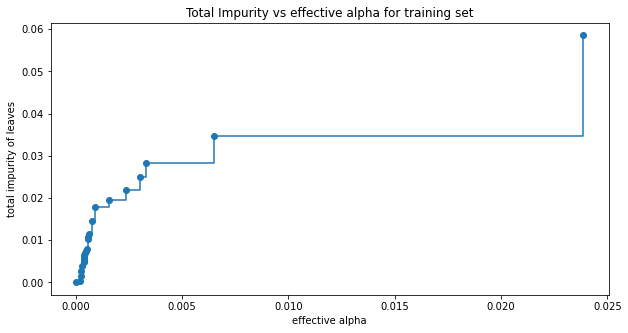

<IPython.core.display.Javascript object>

In [120]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [121]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


<IPython.core.display.Javascript object>

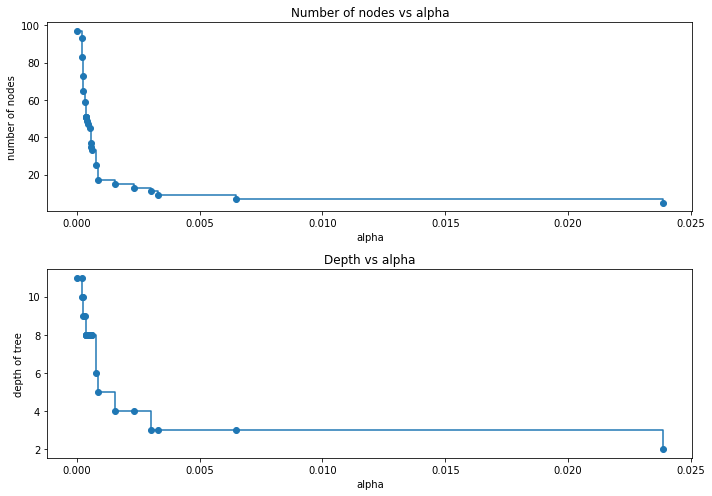

<IPython.core.display.Javascript object>

In [122]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [123]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

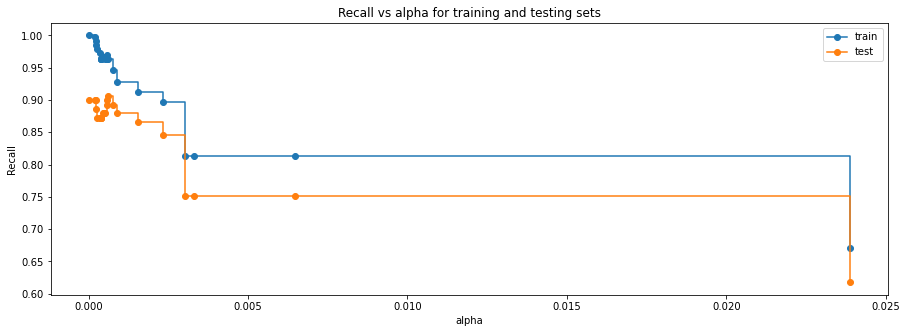

<IPython.core.display.Javascript object>

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

- this doesnt give much difference with the initial model after being post_prunned


In [125]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


<IPython.core.display.Javascript object>

#### Post-Purning

In [126]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=0.023866, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.023866, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

**Checking performance on training data**

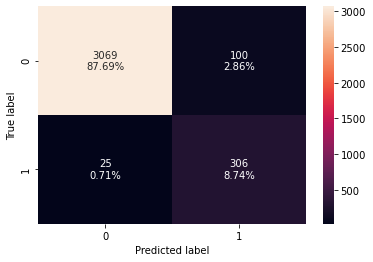

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(estimator_2, X_train, y_train)

In [128]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    estimator_2, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.964286,0.924471,0.753695,0.830393


<IPython.core.display.Javascript object>

- Recall 92%
- Accuracy 96%
- Precision 75%
- F1 83%

**Visualizing the Decision Tree**

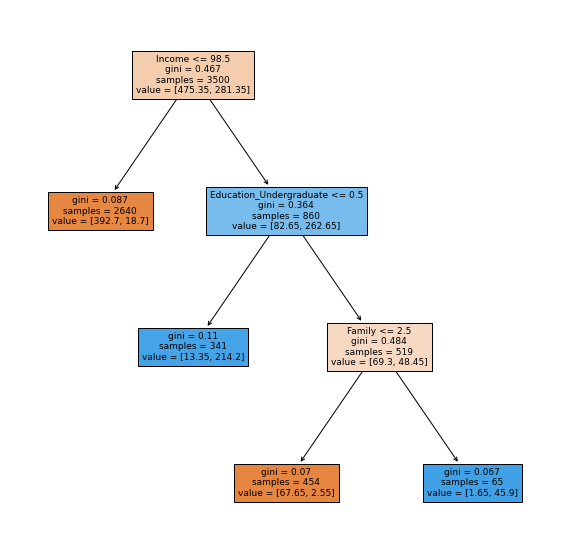

<IPython.core.display.Javascript object>

In [129]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The decision tree is now very simple to read and interpret
- No overlapping of node leaves again

In [130]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



<IPython.core.display.Javascript object>

In [131]:
print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.674921
Family                   0.171953
Education_Undergraduate  0.153126
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CCAvg                    0.000000
CreditCard               0.000000


<IPython.core.display.Javascript object>

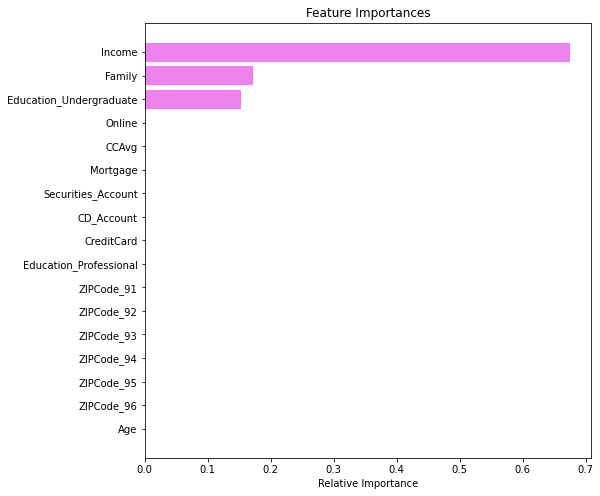

<IPython.core.display.Javascript object>

In [132]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Income is leading, then family and Education

**Checking performance on test data**

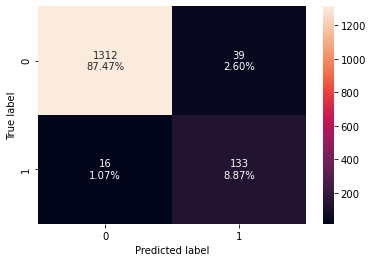

<IPython.core.display.Javascript object>

In [133]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)

In [134]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    estimator_2, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.963333,0.892617,0.773256,0.82866


<IPython.core.display.Javascript object>

## Model Performance Comparison

In [135]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.990286,0.963333
Recall,1.0,0.927492,0.892617
Precision,1.0,0.968454,0.773256
F1,1.0,0.947531,0.828660


<IPython.core.display.Javascript object>

* Decision tree with pre-pruning is giving the highest recall on the test set.
* The tree with pre-pruning is not complex and easy to interpret.

## Conclusions and Recommendations

- After much analysis and model building for prediction, now the bank can know the targeted customers for the loan
- Base on the important features, these are the factors that the bank can use to determine the targeted customers : income family and Education
- Customers that have high/good income should also be considered as target
- Customers with higher education have good tendacy to take the loan offer
- Family size is positively coorelated with the personal_loan.  so customers with big family should also be targeted for the loan
- Also customers with CD_Account should be targeted for the loan offer